Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 6: Vrednovanje klasifikatora i grupiranje

(c) 2015-2017 Domagoj Alagić, Mladen Karan, Jan Šnajder

<i>Verzija: 0.1</i> <br/>
<i>Zadnji put ažurirano: 12. siječnja 2017.</i> 

Objavljeno: **12. siječnja 2017.**<br>
Rok za predaju: U terminu vježbe u tjednu od **16. siječnja 2017.**

### Upute

Šesta laboratorijska vježba sastoji se od **pet** zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Matrice zabune i evaluacijske mjere

Cilj ovog zadatka jest upoznati se s osnovnim evaluacijskim mjerama temeljenima na matrici zabune (engl. *confusion matrix*).

Preuzmite Glass Identification Data Set, koji opisuje rezultate kemijske analize 214 stakala. Riječ je o klasifikacijskom problemu sa šest klasa: na temelju 9 kemijskih značajki stakla potrebno je, u svrhu forenzičke analize, odrediti o kojoj se od šest vrsta stakla radi. Skup podataka možete učitati na sljedeći način:

In [3]:
data = np.loadtxt("./glass.csv", delimiter=',')
glass_X, glass_y = data[:,1:10], data[:,10]

Podijelite skup primjera na skup za učenje i na skup za ispitivanju u omjeru 1:1 (koristite funkciju [`model_selection train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). Naučite SVM s linearnom jezgrom (s pretpostavljenim hiperparametrima) na skupu za učenje.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(glass_X, glass_y, test_size=0.5, random_state=69)

svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### (a)

Upoznajte se s funkcijom [`metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) koja iz stvarnih oznaka i predikcija računa matricu zabune. Izračunajte matricu zabune za naučeni model SVM-a predstavljenog gore.


In [5]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(glass_y, svc.predict(glass_X))
print(cm)

[[59 11  0  0  0  0]
 [26 46  0  2  2  0]
 [10  7  0  0  0  0]
 [ 0  1  0 11  0  1]
 [ 1  1  0  1  6  0]
 [ 0  2  0  0  1 26]]


**Q:** Koja klasa ima najviše pogrešnih pozitivnih klasifikacija (engl. *false positives*), a koja najviše pogrešnih negativnih klasifikacija (engl. *false negatives*)? <br>
**Q:** Što predstavljaju vrijednosti na dijagonali ove matrice?

#### (b)

Definirajte funkciju `twoway_confusion_matrix(cm, i)` koja prima matricu zabune `cm` dimenzija $K\times K$ (pri čemu je $K$ broj klasa) i indeks klase $i$ te izračunava binarnu matricu zabune za klasu $i$ kao pozitivnu klasu. Izračunajte i ispišite binarne matrice zabune za svih 6 klasa iz skupa `glass`.

In [6]:
def twoway_confusion_matrix(cm, i):
    tn = 0
    fp = 0
    fn = 0
    for k in range(0, cm.shape[0]):
        for l in range(0, cm.shape[1]):
            if(i == k == l):
                tp = cm[k,l]
            elif(i == k):
                fn = fn + cm[k, l]
            elif(i == l):
                fp = fp + cm[k, l]
            else:
            #elif(k == l):
                tn = tn + cm[k,l]
    return np.matrix([[tn, fp], [fn, tp]])

def mapclass(i):
    if(i < 3):
        return i+1
    elif(i < 8):
        return i+2
    return None

for i in range(0, 6):
    print("for class i = "+str(mapclass(i))+":")
    print(twoway_confusion_matrix(cm, i))
    print("")

for class i = 1:
[[107  37]
 [ 11  59]]

for class i = 2:
[[116  22]
 [ 30  46]]

for class i = 3:
[[197   0]
 [ 17   0]]

for class i = 5:
[[198   3]
 [  2  11]]

for class i = 6:
[[202   3]
 [  3   6]]

for class i = 7:
[[184   1]
 [  3  26]]



#### (c)

Pomoću funkcija iz (a) i (b) dijela zadatka, definirajte funkcije `accuracy`, `precision`, `recall` i `f1` za izračun točnosti, preciznosti, odziva odnosno F1-mjere. Svaka od ovih funkcija uzima kao argumente stvarne oznake primjera `y_true` i predviđene oznake `y_pred`. Funkcije trebaju izračunavati mikro i makro varijante ovih mjera, što se određuje opcijom `averaging=micro` odnosno `averaging=macro` (podrazumijevana vrijednost).

Izračunajte vrijednosti ovih evaluacijskih mjera na skupu `glass`. Uvjerite da vaša implementacija daje identične rezultate kao funkcije iz paketa [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Ove funkcije pretpostavljaju makro-mjere, osim one za F1 koja može primiti i parametar koji definira hoće li se izračunati mikro ili makro vrijednost.

In [7]:
def accuracy(cm, averaging='macro'):
    total = 0
    right = 0
    if(averaging == 'micro'):
        for k in range(0, cm.shape[0]):
            for l in range(0, cm.shape[1]):
                if(k == l):
                    right = right + cm[k,l]
                total = total + cm[k,l]
        return right*1.0/total
    elif(averaging == 'macro'):
        res = 0
        n = 214
        for k in range(0, 6):
            twcm = twoway_confusion_matrix(cm, k)
            #n = twcm[0,0] + twcm[0,1] + twcm[1,0] + twcm[1,1]
            res = res + (twcm[0,0] + twcm[1,1]) * 1.0 / n
        return res*1.0/6
    return None

def recall(cm, averaging = 'macro'):
    if(averaging == 'micro'):
        tp = 0
        fp = 0
        for k in range(0, 6):
            for l in range(0, 6):
                if(k == l):
                    tp = tp + cm[k, l]
                else:
                    fp = fp + cm[k, l]
        return tp*1.0/(fp+tp)
    elif(averaging == 'macro'):
        n = 214
        res = 0
        for k in range(0, 6):
            twcm = twoway_confusion_matrix(cm, k)
            #n = twcm[0,0] + twcm[0,1] + twcm[1,0] + twcm[1,1]
            if(twcm[1,1] == twcm[0, 1] == 0):
                continue
            res = res + twcm[1,1] * 1.0 / (twcm[1,0] + twcm[1,1])
        return res * 1.0 / 6
    return None

def f1(cm, averaging = 'macro'):
    if(averaging == 'micro'):
        tp = 0
        fp = 0
        fn = 0
        for k in range(0,6):
            for l in range(0, 6):
                if(k == l):
                    tp = tp + cm[k,l]
                elif(k > l):
                    fn = fn + cm[k,l]
                else:
                    fp = fp + cm[k,l]
        return 1.0*tp/(1*tp+fp+fn)
    elif(averaging == 'macro'):
        n = 214
        res = 0
        for k in range(0, 6):
            twcm = twoway_confusion_matrix(cm, k)
            #n = twcm[0,0] + twcm[0,1] + twcm[1,0] + twcm[1,1]
            if(twcm[1,1] == twcm[0, 1] == 0):
                p = 0
            else:
                p = twcm[1,1] * 1.0 / (twcm[0,1] + twcm[1,1])
            if(twcm[1,1] == twcm[1, 0] == 0):
                r = 0
            else:
                r = twcm[1,1] * 1.0 / (twcm[1,0] + twcm[1,1])
            if(p == r == 0):
                continue
            res = res + 2.0*p*r/(p+r)
        return res * 1.0 / 6
    return None

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

print accuracy(cm, averaging = 'micro') == accuracy_score(glass_y, svc.predict(glass_X))
print recall(cm, averaging = 'macro') == recall_score(glass_y, svc.predict(glass_X), average='macro')
print recall(cm, averaging = 'micro') == recall_score(glass_y, svc.predict(glass_X), average='micro')
print f1(cm, averaging = 'macro') == f1_score(glass_y, svc.predict(glass_X), average='macro')
print f1(cm, averaging = 'micro') == f1_score(glass_y, svc.predict(glass_X), average='micro')
print
print "acc, macro: " + str(accuracy(cm, averaging='macro'))
print "acc, micro: " + str(accuracy(cm, averaging='micro'))
print
print "rec, micro: " + str(recall(cm, averaging = 'micro'))
print recall_score(glass_y, svc.predict(glass_X), average='micro')
print "rec, macro: " + str(recall(cm, averaging = 'macro'))
print recall_score(glass_y, svc.predict(glass_X), average='macro')
print
print "f1, micro: " + str(f1(cm, averaging = 'micro'))
print f1_score(glass_y, svc.predict(glass_X), average='micro')
print "f1, macro: " + str(f1(cm, averaging = 'macro'))
print f1_score(glass_y, svc.predict(glass_X), average='macro')

True
True
True
True
True

acc, macro: 0.897196261682
acc, micro: 0.691588785047

rec, micro: 0.691588785047
0.691588785047
rec, macro: 0.642915422952
0.642915422952

f1, micro: 0.691588785047
0.691588785047
f1, macro: 0.626630862073
0.626630862073


D:\FER\Programs\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Q:** Koja je razlika između mikro- i makro-procjene?

### 2. Vrednovanje klasifikatora

Kako bismo se uvjerili koliko naš naučeni model zapravo dobro radi, nužno je provesti evaluaciju modela. Ovaj korak od presudne je važnosti u svim primjenama strojnog učenja, pa je stoga bitno znati provesti evaluaciju na ispravan način. U ovom zadatku fokusirat ćemo se na k-struku ugniježđenu unakrsnu provjeru.

#### (a)

Implementirajte funkciju `nested_kfold_cv(clf, param_grid, X, y, k1, k2)` koja provodi k-struku ugniježđenu unakrsnu provjeru. Argument `clf` predstavlja vaš klasifikator (nenaučena instanca), `param_grid` rječnik hiperparametara i njihovih vrijednosti koje se isprobavaju u učenju, `X` i `y` označeni skup podataka, a `k1` i `k2` broj preklopa u vanjskoj, odnosno unutarnjoj petlji. Međutim, unutarnju petlju možete izvesti korištenjem razreda [`model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Upoznajte se sa spomenutim razredom. Za vanjsku petlju, poslužite se razredom [`model_selection.KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) koji zna kako raditi preklope iz danih mu podataka. Proučite kako se mora definirati rječnik vrijednosti hiperparametara (treba se držati posebnog načina imenovanja varijabli) na http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py.

Funkcija vraća listu generalizacijskih pogrešaka kroz preklope vanjske petlje.

In [14]:
from sklearn.model_selection import GridSearchCV, KFold

def nested_kfold_cv(clf, param_grid, X, y, k1=10, k2=3):
    
    kf1 = KFold(n_splits=k1, shuffle=True)
    kf1.get_n_splits(X, y)

    scores = []
    
    for train_index, test_index in kf1.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #unutarnja
        gscv = GridSearchCV(estimator = clf, param_grid = param_grid)
        gscv.fit(X_train, y_train)
        #print gscv.best_params_
        scores.append(accuracy_score(y_test, gscv.predict(X_test)))
    return scores

**Q:** Zašto nam treba još jedna razina k-struke provjere?

#### (b)

Dodatno, vrijedi znati kako iskoristiti `GridSearchCV` u slučaju da moramo raditi i pretprocesiranje podataka. Stoga se i upoznajte s razredom [`pipeline.Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), koji omogućava jednostavno stvaranje cjevovoda modela (bilo za pretprocesiranje ili za klasifikaciju/regresiju/itd.) koji se kasnije može koristiti kao bilo koji drugi model (jedan objekt s `fit` i `predict` funkcijama).

Pripremite cjevovod koji se sastoji od [standardnog skaliranja](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) i SVM-a s RBF-jezgrom.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline(steps = [('standard',StandardScaler()), ('svc', SVC())])

#### (c)

Naučite vaš cjevovod na `glass` skupu podataka koristeći k-struku ugniježđenu unakrsnu provjeru (korištenjem Vaše funkcije s pretpostavljenim vrijednostima za `k1` i `k2`). Trebate isprobati hiperparametre $C\in\{2^{-3},2^{-4},\dots,2^{3}\}$ i $\gamma\in\{2^{-3},2^{-4},\dots,2^{3}\}$. Ispišite srednju vrijednost generalizacijske pogreške.

In [13]:
l = []
for i in range(-3, 4):
    l.append(2**i)
p_grid = {"svc__C": l, "svc__gamma": l, "svc__kernel":['rbf']}

np.mean(nested_kfold_cv(clf = pipe, param_grid = p_grid, X = glass_X, y = glass_y))

{'svc__gamma': 0.5, 'svc__kernel': 'rbf', 'svc__C': 1}
{'svc__gamma': 0.125, 'svc__kernel': 'rbf', 'svc__C': 1}
{'svc__gamma': 0.125, 'svc__kernel': 'rbf', 'svc__C': 1}
{'svc__gamma': 0.25, 'svc__kernel': 'rbf', 'svc__C': 8}
{'svc__gamma': 0.125, 'svc__kernel': 'rbf', 'svc__C': 1}
{'svc__gamma': 0.5, 'svc__kernel': 'rbf', 'svc__C': 8}
{'svc__gamma': 0.125, 'svc__kernel': 'rbf', 'svc__C': 4}
{'svc__gamma': 0.125, 'svc__kernel': 'rbf', 'svc__C': 4}
{'svc__gamma': 0.25, 'svc__kernel': 'rbf', 'svc__C': 0.5}
{'svc__gamma': 0.125, 'svc__kernel': 'rbf', 'svc__C': 2}


0.695887445887446

### 3. Statističko testiranje

Scenarij koji nas najviše zanima jest usporedba dvaju klasifikatora, odnosno, je li jedan od njih zaista bolji od drugog. Jedini način kako to možemo zaista potvrditi jest statističkom testom, u našem slučaju **uparenim t-testom**. Njime ćemo se baviti u ovom zadatku.

#### (a)

U ovom zadatku bavit ćemo se testiranjem je li razlika u perfomansama dva klasifikatora statistički značajna. Nad našim skupom podataka proveli smo unakrsnu provjeru s $N \in \{5, 10, 50\}$ preklopa. Kao rezultat dobili smo tri skupa rezultata (po jedan za svaku vrijednost $N$) u kojima imamo uparene perfomanse za oba klasifikatora kroz preklope.

In [15]:
np.random.seed(1337)
C1_scores_5folds = np.random.normal(78, 4, 5)
C2_scores_5folds = np.random.normal(81, 2, 5)

C1_scores_10folds = np.random.normal(78, 4, 10)
C2_scores_10folds = np.random.normal(81, 2, 10)

C1_scores_50folds = np.random.normal(78, 4, 50)
C2_scores_50folds = np.random.normal(81, 2, 50)

#### (b)

Iskoristite ugrađenu funkciju [`scipy.stats.ttest_rel`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html) za provedbu uparenog t-testa nad podatcima s $N=10$ preklopa.

In [16]:
from scipy.stats import ttest_rel

ttest_rel(C1_scores_10folds, C2_scores_10folds, axis=0)

Ttest_relResult(statistic=-0.8842099536936594, pvalue=0.3995873733387435)



#### (c)

Zatim sami implementirajte funkciju `paired_t_test` koja provodi upareni t-test. Funkcija prima dvije liste vrijednosti, a  vraća dvije vrijednosti: iznos t-statistike i p-vrijednost. Za računanje p-vrijednosti uzmite u obzir da t-statistika ima studentovu razdiobu s $N-1$ stupnjeva slobode. Kao što znate, p-vrijednost jest zapravo $P(x < -t) + P(x > t)$, gdje $t$ označava apsolutni iznos t-statistike. Do ovih vjerojatnosti možete doći preko funkcija `scipy.stats.t.cdf` ili `scipy.stats.t.sf` iz paketa [`scipy.stats.t`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html). Usporedite vlastitu implementaciju s onom ugrađenom.

In [17]:
from scipy.stats import t

def paired_t_test(data1, data2):
    if(len(data1) != len(data2)):
        return None
    diff = data1-data2
    mean_diff = np.mean(diff)
    SE = np.std(diff, ddof = 1)*1.0/(np.sqrt(len(diff)))
    statistics = mean_diff/SE
    p = 2-t.sf((mean_diff/SE), df = len(data1)-1)*2
    if(p>1):
        p = 2-p
    return (statistics, p)
    
paired_t_test(C1_scores_10folds, C2_scores_10folds)

(-0.8842099536936594, 0.39958737333874339)

**Q:** Koju hipotezu $H_0$ i alternativnu hipotezu $H_1$ testiramo ovim testom? <br>
**Q:** Ako odaberemo razinu značajnosti $\alpha = 0.05$, hoćemo li odbaciti hipotezu $H_0$? <br>
**Q:** Koja pretpostavka na vjerojatnosnu razdiobu primjera je napravljena u gornjem testu? Je li ona opravdana?

#### (d) 

Ponovite prethodni zadatak na skupovima podataka s 5 i 50 foldova. Razmotrite kako broj preklopa (primjera u našem uzorku) utječe na rezultat testiranja.

In [18]:
print paired_t_test(C1_scores_5folds, C2_scores_5folds)
print paired_t_test(C1_scores_50folds, C2_scores_50folds)

(-1.9936398023627793, 0.11696313548164916)
(-5.8240553160508179, 4.3638376889809649e-07)


#### (e)

Završno, naučite model logističke regresije (bez preslikavanja značajki u višu dimenziju) sa standardnim skaliranjem na način jednak onom u zadatku 1c. Isprobajte razine regularizacije $C\in\{2^{-3},2^{-4},\dots,2^{3}\}$. Nakon toga imat ćete po 10 točnosti za svaki od preklopa za svaki od dva modela (LR i SVM). Provedite upareni t-test i kažite razlikuju li se performanse ova dva modela s razinom značajnosti $\alpha = 0.05$.

In [19]:
from sklearn.linear_model import LogisticRegression

l = []
for i in range(-3, 4):
    l.append(2**i)
p_grid = {"svc__C": l, "svc__gamma": l, "svc__kernel":['rbf']}
pipe = Pipeline(steps = [('standard',StandardScaler()), ('svc', SVC())])
svmscores = nested_kfold_cv(clf = pipe, param_grid = p_grid, X = glass_X, y = glass_y)

pipe = Pipeline(steps = [('standard',StandardScaler()), ('log', LogisticRegression())])
p_grid = {"log__C": l}
logscores = nested_kfold_cv(clf = pipe, param_grid = p_grid, X = glass_X, y = glass_y)

In [41]:
print svmscores
print logscores
print
print ttest_rel(np.array(svmscores), np.array(logscores))
print
print paired_t_test(np.array(svmscores), np.array(logscores))

[0.54545454545454541, 0.54545454545454541, 0.63636363636363635, 0.68181818181818177, 0.7142857142857143, 0.5714285714285714, 0.61904761904761907, 0.7142857142857143, 0.5714285714285714, 0.8571428571428571]
[0.5, 0.59090909090909094, 0.68181818181818177, 0.54545454545454541, 0.7142857142857143, 0.80952380952380953, 0.7142857142857143, 0.47619047619047616, 0.5714285714285714, 0.52380952380952384]

Ttest_relResult(statistic=0.62734976657890051, pvalue=0.54601454817754003)

(0.62734976657890051, 0.54601454817754003)


**Q:** Koji je model u konačnici bolji i je li ta prednost značajna uz $\alpha = 0.05$?

### 4. Algoritam k-srednjih vrijednosti

#### (a)
Za početak, implementirajte algoritam k-srednjih vrijednosti nadopunjući donji predložak razreda ``DIYKMeans``. Konstruktor razreda prima početne centroide grupa (``init_centroids``), broj grupa $K$ (``num_clusters``) i maksimalan broj iteracija algoritma (``max_iter``). Nadalje, nadopunite funkciju ``fit(X)`` koja provodi učenje grupiranja iz danih podataka ``X``, te funkciju ``predict(X)`` koja predviđa grupu danih podataka ``X``. Algoritam se provodi dok se ne dosegne ``max_iter`` iteracija ili dok razlika između $J$ dviju iteracija ne padne ispod `tol`. Pripremite skup podataka po volji i ručno provedite algoritam te usporedite izlaze Vaše implementacije modela (završni centroidi, predikcije, itd.).

**NB**: Pripazite na tip podataka ulaznih primjera. Ako su ulazni podaci vektori cijelih brojeva, računanje njihove srednje vrijednosti može *opet* rezultirati cjelobrojnim srednjim vrijednostima. Tip podataka možete eksplicitno definirati pri stvaranju numPy-polja, o čemu možete pročitati [ovdje](https://docs.scipy.org/doc/numpy/user/basics.types.html).

In [7]:
from copy import deepcopy
from collections import defaultdict
from sklearn.metrics import accuracy_score

class DIYKMeans(object):
    
    def __init__(self, init_centroids, num_clusters=3, max_iter=300, tol=0.001):
        
        if init_centroids is None or init_centroids.shape[0] != num_clusters:
            raise Exception("Exactly `num_clusters` of initial centroids must be provided.")
        
        self.num_clusters = num_clusters
        self.centroids = deepcopy(init_centroids)
        self.max_iter = max_iter
        self.tol = tol
        return
        
    def fit(self, X):
        for iteration in range(0, self.max_iter):
            y_pr = self.predict(X)
            right = True
            br = []
            nz = []
            for l in range(0, self.num_clusters):
                br.append(array((0.0, 0.0)))
                nz.append(0)
            for l in range(0, len(X)):
                br[y_pr[l]] = br[y_pr[l]] + X[l]
                nz[y_pr[l]] = nz[y_pr[l]] + 1
            for l in range(0, self.num_clusters):
                if(nz[l] != 0):
                    self.centroids[l] = array(br[l])*1.0/nz[l]
            ynew = self.predict(X)
            #print self.centroids
            if(all(ynew == y_pr)):
                break;
        return self
    
    def predict(self, X):
        y = []
        for x in X:
            dist = []
            for i in range(0, self.num_clusters):
                dist.append(np.linalg.norm(x-self.centroids[i]))
            y.append(np.argmin(dist))
        return y

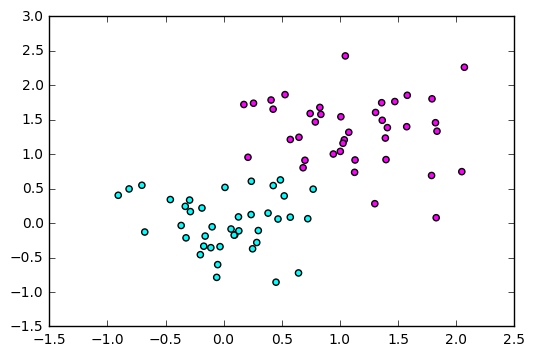

0.9875


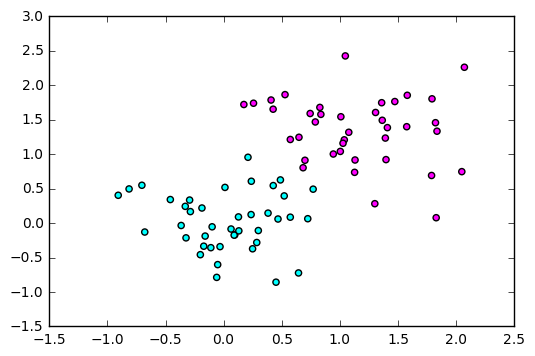

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=80, n_features=2, centers=[[0, 0], [1.1, 1.2]], cluster_std=[0.4, 0.5], random_state=115)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.get_cmap("cool"), s=20)
plt.show()

centr = []
for i in range(0, 2):
    t1 = np.random.uniform(0.0, 2.0)
    t2 = np.random.uniform(0.0, 2.0)
    centr.append((t1, t2))
    
km = DIYKMeans(init_centroids = np.array(centr), num_clusters=2)
km.fit(X)
print accuracy_score(y, km.predict(X))

plt.scatter(X[:,0], X[:,1], c=km.predict(X), cmap=plt.get_cmap("cool"), s=20)
plt.show()


#### (b)

Kao što možete pretpostaviti, najveći problem ovog algoritma je to što unaprijed zahtjeva broj grupa u koje će grupirati podatke. Ta informacija nam često nije dostupna (kao što nam nisu dostupne ni oznake primjera) te je stoga potrebno nekako izabrati najbolju vrijednost hiperparametra $K$. Jedan od naivnijih pristupa jest **metoda lakta/koljena** (engl. *elbow method*) koja se temelji na tome da se izabere ona vrijednost hiperparametra $K$ za koju se dogodi nagla promjena kriterijske funkcije algoritma k-srednjih vrijednosti $J$. Iz laičke perspektive, uzima se onaj $K$ za koji se na krivulji od $J$ s obzirom na $K$ pojavi "lakat". 

Sada ćemo se, kao i inače, prebaciti na ugrađenu implementaciju algoritma k-srednjih vrijednosti, dostupnoj u [`cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Iskoristite skup podataka `Xp` dan niže. Isprobajte vrijednosti hiperparametra $K$ iz $[0,1,\ldots,15]$. Ne trebate dirati nikakve hiperparametre modela osim $K$. Iscrtajte krivulju od $J$ u ovisnosti o broju grupa $K$.

**NB**: Kriterijska funkcija algoritma k-srednjih vrijednosti još se i naziva **inercijom** (engl. *inertia*). Za naučeni model, vrijednost kriterijske funkcije $J$ dostupna je kroz razredni atribut `inertia_`.

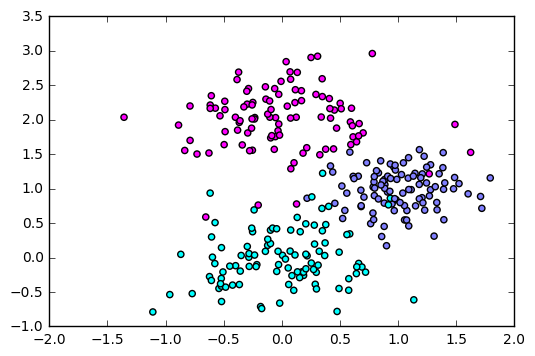

In [29]:
from sklearn.datasets import make_blobs

Xp, yp = make_blobs(n_samples=300, n_features=2, centers=[[0, 0], [1.0, 1.0], [0, 2]], 
                    cluster_std=[0.45, 0.3, 0.45], random_state=96)
plt.scatter(Xp[:,0], Xp[:,1], c=yp, cmap=plt.get_cmap("cool"), s=20)

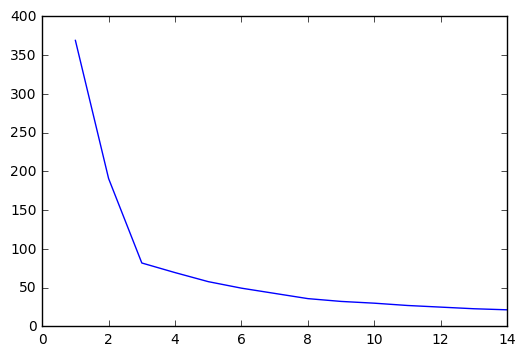

In [30]:
from sklearn.cluster import KMeans

#fig,ax = plt.subplots(4,4, figsize=(20,20))
index = [(0,0), (0,1), (0,2), (0,3), (1,0), (1,1), (1,2), (1,3), (2,0), (2,1), (2,2), (2,3), (3,0), (3,1), (3,2), (3,3)]
J = []
for K in range(1, 15):
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(Xp, yp)
    J.append(kmeans.inertia_)
plt.plot(range(1, 15), J)
    #plt.figure(figsize=(3,2))
    #ax[index[K-1]].scatter(Xp[:,0], Xp[:,1], c=kmeans.predict(Xp), cmap=plt.get_cmap("Set1"), s=20)

**Q:** Koju biste vrijednost hiperparametra $K$ izabrali na temelju ovog grafa? Zašto? <br>
**Q:** Je li ova metoda robusna? <br>
**Q:** Znate li još koji način kako izabrati vrijednost hiperparametra $K$? <br>
**Q:** Možemo li izabrati onaj $K$ koji minimizira pogrešku $J$? Objasnite.

#### (c)

Kako evaluirati točnost modela grupiranja ako imamo stvarne oznake svih primjera (a u našem slučaju imamo, jer smo mi ti koji smo generirali podatke)? Često korištena mjera jest **Randov indeks** koji je zapravo pandan točnosti u zadatcima klasifikacije. Implementirajte funkciju `rand_index_score(y_gold, y_predict)` koja ga računa. Funkcija prima dva argumenta: listu stvarnih grupa kojima primjeri pripadaju (`y_gold`) i listu predviđenih grupa (`y_predict`).

In [31]:
#http://stats.stackexchange.com/questions/207366/calculating-the-adjusted-rand-index
#http://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means
from scipy.misc import comb

def rand_index_score(y_gold, y_predict):
    if(len(set(y_gold))!=len(set(y_predict)) or len(y_gold) != len(y_predict)):
        return "Error in length"
    else:
        N = len(set(y_gold))
        matrix = np.zeros((N,N))
        for pos in range(0, len(y_gold)):
            matrix[y_gold[pos], y_predict[pos]] = matrix[y_gold[pos], y_predict[pos]] + 1
        diag = []
        col = []
        row = []
        for N in np.diagonal(matrix):
            diag.append(comb(N,2))
        for N in np.sum(matrix, axis =0):
            col.append(comb(N,2))
        for N in np.sum(matrix, axis =1):
            row.append(comb(N,2))
        print matrix
        n = np.sum(matrix)
        br = np.sum(diag) - 1.0*np.sum(col)*np.sum(row)/comb(n,2)
        nz = 0.5*(np.sum(col)+np.sum(row)) - 1.0*np.sum(col)*np.sum(row)/comb(n,2)
        return br*1.0/nz

Zatim evaluirajte gornji model (onaj s najboljim $K$) na podatcima `Xp` (efektivno skup za učenje) koristeći Randov indeks.

In [34]:
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters = 3)
kmeans.fit(Xp, yp)
print rand_index_score(yp, kmeans.predict(Xp))
print adjusted_rand_score(yp, kmeans.predict(Xp))

[[  94.    6.    0.]
 [   0.  100.    0.]
 [   3.    5.   92.]]
0.860143631791
0.862957845453


**Q:** Kako biste svojim riječima opisali što mjeri Randov indeks? <br>
**Q:** Koji su glavni problemi ove metrike?

### 5. Pretpostavke algoritma k-srednjih vrijednosti

U ovom i sljedećim podzadatcima fokusirat ćemo se na temeljne pretpostavke algoritma k-srednjih vrijednosti te što se događa ako te pretpostavke nisu zadovoljene.

#### (a)

Prvo, krenite od podataka `X1`, koji su generirani korištenjem funkcije [`datasets.make_blobs`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), koja stvara grupe podataka pomoću izotropskih Gaussovih distribucija.

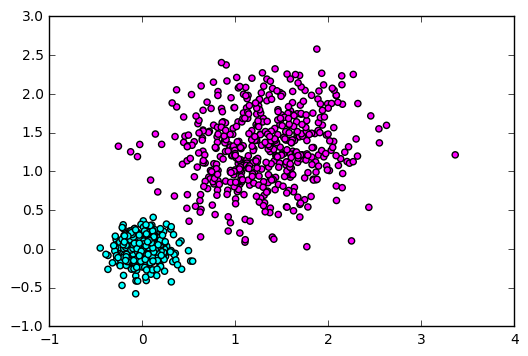

In [35]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0], [1.3, 1.3]], cluster_std=[0.15, 0.5], random_state=96)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.get_cmap("cool"), s=20)

Naučite model k-srednjih vrijednosti (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

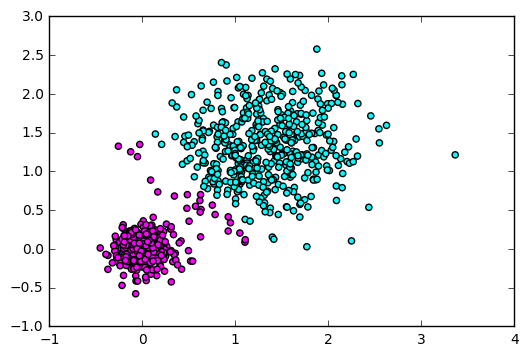

In [36]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X1, y1)
plt.scatter(X1[:,0], X1[:,1], c=kmeans.predict(X1), cmap=plt.get_cmap("cool"), s=20)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-srednjih vrijednosti ovdje narušena? <br>
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (b)

Isprobajte algoritam k-srednjih vrijednosti na podatcima generiranim korištenjem funkcije [`datasets.make_circles`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), koja stvara dvije grupe podataka tako da je jedna unutar druge.

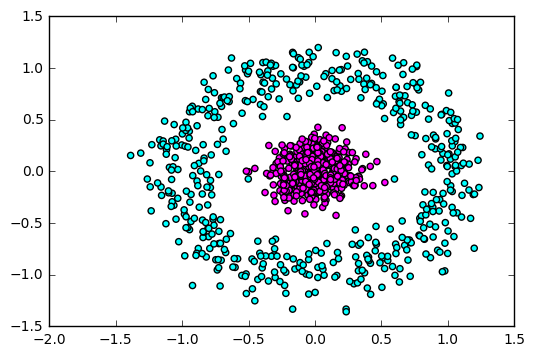

In [37]:
from sklearn.datasets import make_circles

X2, y2 = make_circles(n_samples=1000, noise=0.15, factor=0.05, random_state=96)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=plt.get_cmap("cool"), s=20)

Ponovno, naučite model k-srednjih vrijednosti (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

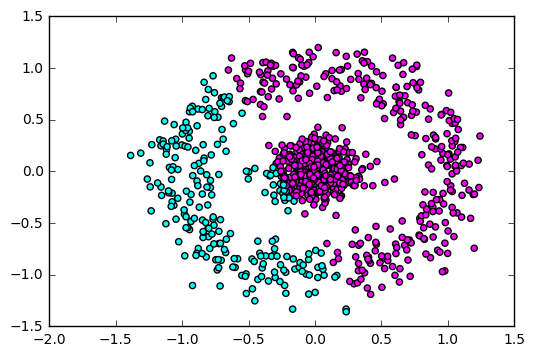

In [38]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X2, y2)
plt.scatter(X2[:,0], X2[:,1], c=kmeans.predict(X2), cmap=plt.get_cmap("cool"), s=20)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-srednjih vrijednosti ovdje narušena? <br>
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (c)

Završno, isprobat ćemo algoritam na sljedećem umjetno stvorenom skupu podataka:

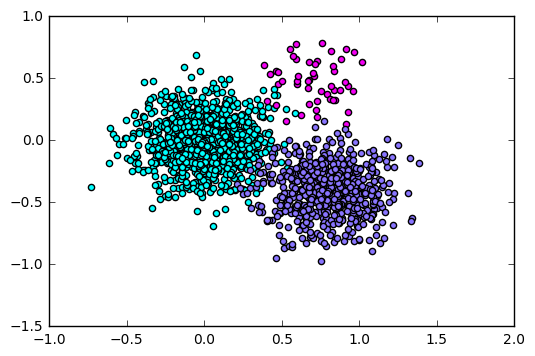

In [39]:
X31, y31 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0]], cluster_std=[0.2], random_state=69)
X32, y32 = make_blobs(n_samples=50, n_features=2, centers=[[0.7, 0.5]], cluster_std=[0.15], random_state=69)
X33, y33 = make_blobs(n_samples=600, n_features=2, centers=[[0.8, -0.4]], cluster_std=[0.2], random_state=69)
plt.scatter(X31[:,0], X31[:,1], c="#00FFFF", s=20)
plt.scatter(X32[:,0], X32[:,1], c="#F400F4", s=20)
plt.scatter(X33[:,0], X33[:,1], c="#8975FF", s=20)

# Just join all the groups in a single X.
X3 = np.vstack([X31, X32, X33])
y3 = np.hstack([y31, y32, y33])

Ponovno, naučite model k-srednjih vrijednosti (ovaj put idealno pretpostavljajući $K=3$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

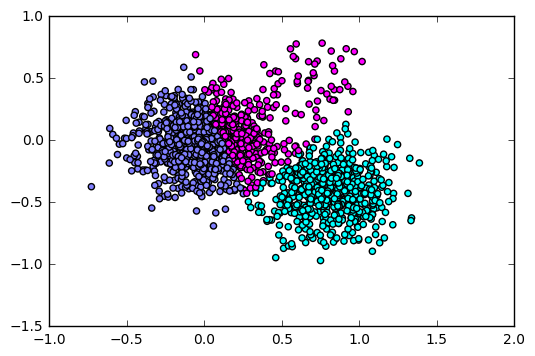

In [40]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X3, y3)
plt.scatter(X3[:,0], X3[:,1], c=kmeans.predict(X3), cmap=plt.get_cmap("cool"), s=20)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-srednjih vrijednosti ovdje narušena? <br>
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (d)

Sada kada ste se upoznali s ograničenjima algoritma k-srednjih vrijednosti, isprobat ćete grupiranje modelom mješavine Gaussa (*Gaussian Mixture Models; GMM*), koji je generalizacija algoritma k-srednjih vrijednosti (odnosno, algoritam k-srednjih vrijednosti specijalizacija je GMM-a). Implementacija ovog modela dostupna je u [`mixture.GaussianMixture`](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture). Isprobajte ovaj model (s istim pretpostavkama o broju grupa) na podacima iz podzadataka (a)-(c). Ne morate mijenjati nikakve hiperparametre ni postavke osim broja komponenti.

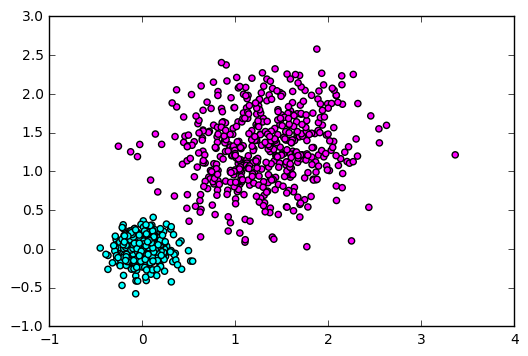

In [41]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2)
gm.fit(X1, y1)
plt.scatter(X1[:,0], X1[:,1], c=gm.predict(X1), cmap=plt.get_cmap("cool"), s=20)

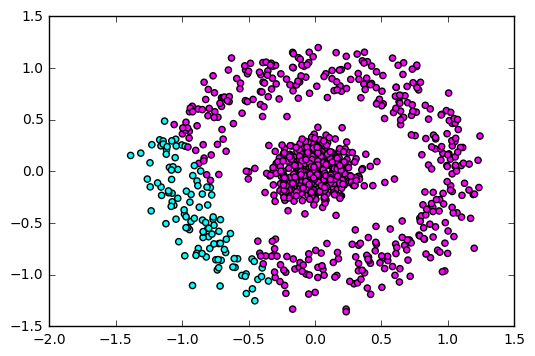

In [45]:
gm = GaussianMixture(n_components=2)
#gm.fit(X1, y1)
gm.fit(X2, y2)
plt.scatter(X2[:,0], X2[:,1], c=gm.predict(X2), cmap=plt.get_cmap("cool"), s=20)

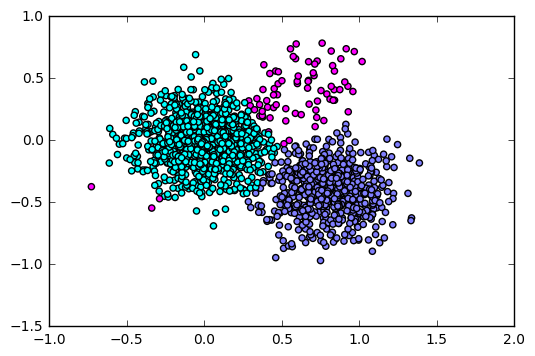

In [43]:
gm = GaussianMixture(n_components=3)
gm.fit(X3, y3)
plt.scatter(X3[:,0], X3[:,1], c=gm.predict(X3), cmap=plt.get_cmap("cool"), s=20)

**Q:** Uspjeva li GMM riješiti "probleme" koje ima algoritam k-srednjih vrijednosti? Zašto?